# Intelligence Artificielle 
# TP7- Les Réseaux de Neurones Convolutifs, Génératifs et Récurrents

## Partie 1: Les réseaux de neurones convolutifs (CNN)

Les réseaux de neurones convolutifs sont directement inspirés du cortex visuel des vertébrés. Un réseau de neurones à convolution, appelé aussi convnet (pour «Convolutional Network»), ou encore CNN (pour «Convolutional Neural Network»).

Il existe quatre types de couches pour un réseau de neurones convolutif: la couche de convolution, la couche de pooling, la couche de correction ReLU et la couche fully-connected. 

### Un petit exemple sur les données MNIST

**Accès aux ensembles de données - DIGITS**

Keras fournit des classes d'accès intégrées pour MNIST. Il est important de noter que les données MNIST sont déjà séparées en deux ensembles:

- **train:** Utilisé pour l'apprentissage du modèle.
- **test:** Utilisé pour la validation.

Importation de bibliothèques

In [1]:
# importation de bibliothèques
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

Importer et séparer les données MNIST (train/test)

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


**Affichage des chiffres**

Le code suivant montre ce que contiennent les fichiers MNIST:

In [3]:
from IPython.display import display
import pandas as pd

# Afficher sous forme de texte
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 5)

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Chiffre MNIST unique
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
Labels: [5 0 4 ... 5 6 8]
Shape for single: (28, 28)


0   1   2   3   4   5   6   ...  21  22  23  24  25  26  27
0    0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0
1    0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0
..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..
26   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0
27   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0

[28 rows x 28 columns]

Image (#105): Which is digit '1'


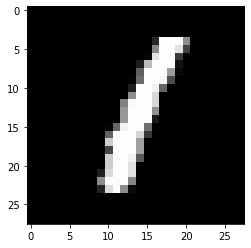

In [4]:
# Afficher sous forme d'image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 105 # Changer pour choisir un nouveau chiffre
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

<Figure size 432x288 with 0 Axes>

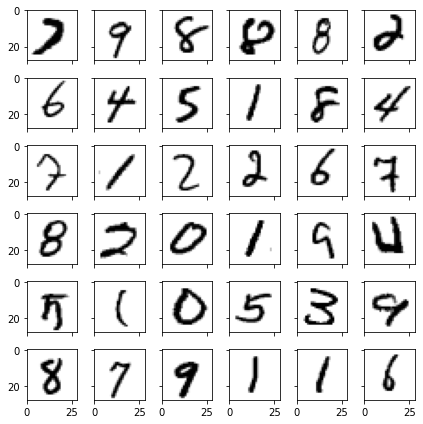

In [5]:

import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

**Architecture du modèle CNN**

In [6]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

# Hyperparamètres

batch_size = 128
num_classes = 10
epochs = 12

# Dimensions de l'image d'entrée
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Normalisation
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))

# Convertir les vecteurs de classe en matrices de classes binaires
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

# Construction du modèle CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


**Apprentissage de CNN - DIGITS**

In [7]:
import tensorflow as tf
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

# Temps d'exécution presque 10 minutes
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60.
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)
elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
469/469 - 211s - loss: 0.2405 - accuracy: 0.9276 - val_loss: 0.0513 - val_accuracy: 0.9845
Epoch 2/12
469/469 - 244s - loss: 0.0835 - accuracy: 0.9748 - val_loss: 0.0412 - val_accuracy: 0.9862
Epoch 3/12
469/469 - 248s - loss: 0.0644 - accuracy: 0.9811 - val_loss: 0.0391 - val_accuracy: 0.9873
Epoch 4/12
469/469 - 251s - loss: 0.0502 - accuracy: 0.9849 - val_loss: 0.0317 - val_accuracy: 0.9903
Epoch 5/12
469/469 - 255s - loss: 0.0433 - accuracy: 0.9868 - val_loss: 0.0296 - val_accuracy: 0.9910
Epoch 6/12
469/469 - 263s - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0272 - val_accuracy: 0.9910
Epoch 7/12
469/469 - 265s - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.0286 - val_accuracy: 0.9912
Epoch 8/12
469/469 - 312s - loss: 0.0298 - accuracy: 0.9904 - val_loss: 0.0291 - val_accuracy: 0.9906
Epoch 9/12
469/469 - 289s - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0262 - val_accuracy: 0.9916
Epoch 10/12
469/469 - 335s - loss: 0.0242 - accuracy: 0.9921 - val_loss: 0.0277 - 

KeyboardInterrupt: 

**Évaluer la précision de classification sur l'ensemble de test - DIGITS**

In [ ]:
# Evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

### Exercice

On voudrait développer un modèle CNN permettant de classifier les données images CIFAR 10: https://www.cs.toronto.edu/~kriz/cifar.html.
L'ensemble de données CIFAR-10 est composé de 60000 images couleur (taille 32x32 pixels)  en 10 classes, avec 6000 images par classe. Il y a 50000 images d'apprentissage et 10000 images de test.

**T.A.F:** Implémenter le modèle CNN en proposant une architecture bien adéquate (normalisation, fonctions d'activation, ...) pour résoudre ce problème de classification. 

**a) Afficher quelques images de CIFAR10**

**b) Comparer les résultats obtenus avec et sans régularisation (courbes de training/test, taux de classification, etc).**

**c) Donner quelques exemples d'images classifiées (données test) avec leur taux de classification.**

In [19]:
import tensorflow as tf
from tensorflow.keras import  layers, models
import matplotlib.pyplot as plt
import numpy as np

# Données CIFAR10
from tensorflow.keras.datasets import cifar10


# A vous 


In [ ]:
# On sépare les données
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
print('Shape of x_train',x_train.shape)
print('Shape of y_train',y_train.shape)

In [ ]:
print('Shape of x_test',x_test.shape)
print('Shape of y_test',y_test.shape)

In [ ]:
# On peut regarder la première colonne
x_train[0]

In [ ]:
y_train

In [ ]:
# Normalisation des données
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
x_train[0]

In [ ]:
# nombre de classes
nb_classes = len(np.unique(y_train))
nb_classes

In [ ]:
import keras

y_train = keras.utils.to_categorical(y_train,nb_classes)
y_test = keras.utils.to_categorical(y_test,nb_classes)
y_test

## Partie 2: Les réseaux de neurones génératifs (GAN)

Les réseaux antagonistes génératifs ou GANs (Generative Adversarial Network), sont des algorithmes d’apprentissage non supervisé à base de réseaux de neurones artificiels, qui permettent de modéliser et d’imiter n’importe quelle distribution de données.
    
Concrètement, l’architecture d’un GAN est composée de deux réseaux de neurones, mis en compétition (voir schéma ci-dessous). Le premier, appelé **générateur**, crée un échantillon de données. Dans l’exemple précédent, ce serait un faux tableau avec le style de Bosch. Le deuxième réseau, appelé **discriminateur**, tente de détecter si cet échantillon est originel ou s’il s’agit d’une création de son “adversaire”, le générateur. Ainsi dans notre exemple, le discriminateur essayerait de détecter si une image est une peinture réalisée par Bosch ou s’il s’agit d’une peinture produite par le générateur

#### Voici un petit exemple (données MNIST)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from tqdm import tqdm
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

In [ ]:
# Importer les données MNIST
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convertir la forme de x_train de (60000, 28, 28) en (60000, 784)
    # 784 colonnes par ligne
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

Nous créons le Générateur qui utilise  de simples couches denses activées par la fonction d'activation tanh()

In [ ]:
# Création du générateur
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator 
g=create_generator()
g.summary()

Nous créons maintenant le Discriminateur. Il prendra les données réelles comme entrée qui sont de la taille 784 et également les images générées par le générateur.

In [ ]:
# Création du discriminateur
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator
d =create_discriminator()
d.summary()

Nous créons maintenant le GAN où nous combinons le générateur et le discriminateur.
Nous entrerons l'image bruitée de la forme 100 unités dans le générateur. La sortie générée par le générateur sera transmise au discriminateur.

In [ ]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

Avant de commencer à entraîner le modèle, nous allons écrire une fonction plot_generated_images pour tracer les images générées. De cette façon, nous pouvons voir comment les images sont générées. Nous enregistrons les images générées dans un fichier que nous pouvons voir plus tard

In [ ]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

Nous commençons enfin à apprendre le GAN. Nous aurons d'abord le code complet pour l'apprentissage du GAN, puis nous le décomposerons étape par étape pour comprendre comment se déroule dans la phase d'apprentissage.

In [ ]:
def training(epochs=1, batch_size=128):
    
    #Chargement des données
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Création du GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #générer du bruit aléatoire comme entrée pour initialiser le générateur
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Générer de fausses images MNIST à partir d'une entrée bruitée
            generated_images = generator.predict(noise)
            
            # Obtenez un ensemble aléatoire d'images réelles
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construisez différents ensembles de données réelles et fausses 
            X= np.concatenate([image_batch, generated_images])
            
            # Étiquettes pour les données générées et réelles
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Préentrez le discriminateur sur des données fausses et réelles avant de commencer le gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tromper l'entrée bruitée du générateur en tant que données réelles
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
     
            # Pendant la formation de gan,
            # les poids du discriminateur doivent être fixés.
            #Nous pouvons appliquer cela en définissant le drapeau entraînable
            discriminator.trainable=False
            
            # Entrainer le GAN en alternant la formation du Discriminateur
            # et l'apprentissage du modèle GAN enchaîné avec les poids de Discriminator gelés.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
            plot_generated_images(e, generator)
training(60,128)

**Explication du code**

a) Importer les données MNIST

(X_train, y_train, X_test, y_test) = load_data()


b) Créer le GAN en utilisant Generator et Discriminator. Créer d'abord le réseau neuronal pour Generator et Discriminator.

generator= create_generator()

discriminator= create_discriminator()

gan = create_gan(discriminator, generator)

c) Pour chaque époque, nous utilisons tqdm pour que nos boucles affichent un indicateur de progression intelligent. Nous créons un bruit aléatoire pour initialiser le générateur(installer le package 'tqdm')

noise= np.random.normal(0,1, [batch_size, 100])


d) Le générateur génère alors de faux chiffres MNIST à partir de l'entrée bruitée.

generated_images = generator.predict(noise)


e) Nous devons créer des ensembles de données contenant de fausses images de Generator et des images réelles de l'ensemble de données MNIST que nous fournirons au Discriminator.

#Obtenir un ensemble d'images aléatoire

image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
#Construisez différents mini-lots pour le vrai et le faux,
#chaque mini-lot doit contenir uniquement toutes les images réelles ou toutes les images générées

X= np.concatenate([image_batch, generated_images])


f) Nous créons une variable cible pour les réelles et fausses images.

y_dis=np.zeros(2*batch_size)

y_dis[:batch_size]=0.9


g) Nous pré-entraînons maintenant le discriminateur sur certaines données fausses et réelles avant de démarrer le GAN. Cela permet de vérifier si nos modèles compilés fonctionnent correctement sur nos données réelles ainsi que sur les données bruitées.

discriminator.trainable=True

discriminator.train_on_batch(X, y_dis)


h) Nous prenons l'entrée bruitées du générateur et la trompons comme de vraies données

noise= np.random.normal(0,1, [batch_size, 100])

y_gen = np.ones(batch_size)

i) Lorsque nous apprenons le GAN, nous devons geler les poids du discriminateur. Le GAN est appris en alternant l'apprentissage du Discriminateur puis en entraînant le modèle GAN enchaîné avec des poids de Discriminateur.

discriminator.trainable=False

gan.train_on_batch(noise, y_gen)


j) Pour tous les 20 epochs, nous traçons les images générées

if e == 1 or e % 20 == 0:

    plot_generated_images(e, generator)

### Exercice

Développer un modèle GAN permettant de générer de données (visages) en utilisant la base de données Face qui est accessible sur sur Kaggle: https://www.kaggle.com/gasgallo/faces-data-new. Le générateur génère les images, tandis que le discriminateur détecte si un visage est réel ou a été généré.

In [ ]:
# A vous

## Partie 3: Les réseaux de neurones récurrents (RNN)

Un réseau de neurones récurrent (RNN) est une généralisation d'un réseau de neurones qui possède une mémoire interne. RNN est de nature récurrente car il remplit la même fonction pour chaque entrée de données tandis que la sortie de l'entrée courante dépend du calcul passé. Après avoir produit la sortie, elle est copiée et renvoyée dans le réseau récurrent. Pour prendre une décision, il considère l'entrée courante et la sortie qu'il a apprise de l'entrée précédente.

### Long Short-Term Memory (LSTM)

Les réseaux de mémoire à long terme (LSTM) sont une version modifiée des réseaux de neurones récurrents, ce qui facilite la mémorisation des données passées en mémoire.

**Exemple**

Le code suivant crée le réseau LSTM, qui est un exemple de RNN pour la classification. Le code suivant s'entraîne sur un ensemble de données (x) avec une taille de séquence maximale de 6 (colonnes) et six éléments d'apprentissage (lignes)

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
import numpy as np

max_features = 4 # 0,1,2,3 (total of 4)
x = [
    [[0],[1],[1],[0],[0],[0]],
    [[0],[0],[0],[2],[2],[0]],
    [[0],[0],[0],[0],[3],[3]],
    [[0],[2],[2],[0],[0],[0]],
    [[0],[0],[3],[3],[0],[0]],
    [[0],[0],[0],[0],[1],[1]]
]
x = np.array(x,dtype=np.float32)
y = np.array([1,2,3,2,3,1],dtype=np.int32)

# Convert y2 to dummy variables
y2 = np.zeros((y.shape[0], max_features),dtype=np.float32)
y2[np.arange(y.shape[0]), y] = 1.0
print(y2)

print('Build model...')
model = Sequential()
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, \
               input_shape=(None, 1)))
model.add(Dense(4, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x,y2,epochs=200)
pred = model.predict(x)
predict_classes = np.argmax(pred,axis=1)
print("Predicted classes: {}",predict_classes)
print("Expected classes: {}",predict_classes)

### Exercice
On voudrait implémenter un modèle basé sur l'algorithme LSTM permettant de prédire le cours des actions de Google (Google Stock Price) à partir de séries temporelles multivariées

**a) Importer les données**

In [1]:
### Collection de données

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Données d'apprentissage

train = pd.read_csv('train_lstm.csv')

# Données de test apprentissage

test = pd.read_csv('test_lstm.csv')


**b) Afficher les premières lignes du fichier train**

In [ ]:
# Indexation du Training Set
training_set=train.iloc[:,1:2].values
training_set

**c) Normaliser les données entre 0 et 1**

In [ ]:
# A vous 

**d) Afficher les dimensions du Training Set**

In [ ]:
# A vous 


In [ ]:
# Décomposition de données d'apprentissage en X et y 
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("Shape of X_train",X_train.shape)
print("Shape of y_train", y_train.shape)

**e) Développer l'architecture du modèle LSTM selon les configurations suivantes**:
 - 4 couches LSTM de taille 100 et une couche Dense de taille=1.
 - Utiliser la méthode de Dropout pour la régularisation avec $p \in [0.4, 0.6, 0.6, 0.4]$
 - C'est à vous de choisir l'optimiseur et la fonction de perte

In [ ]:
# A vous


**f) Afficher l'architecture du modèle**

In [ ]:
# A vous

**g) Maintenant, entraîner le modèle avec nombre d'epochs= 100 et la taille de batch=32. Afficher la courbe de loss**

In [ ]:
# A vous

In [ ]:
# Indexation de données de test et les données réelles
real_stock_price = test.iloc[:, 1:2].values
total_data=pd.concat([train['Open'],test['Open']],axis=0)
inputs=total_data[len(train)-len(test)-60:].values
inputs=inputs.reshape(-1,1)

**h) Normaliser les données 'inputs' entre 0 et 1**

In [ ]:
# A vous


In [ ]:
# Construire les features de Test Set
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

**i) Utiliser les données X_test pour la prédiction**

In [ ]:
# A vous

**j) Afficher les valeurs min() et max() de données prédites et de données réelles (real_stock_price)**

In [ ]:
# A vous

In [ ]:
# A vous

In [ ]:
# A vous

In [ ]:
# A vous

**k) Inverser les données prédites/normalisées en utilisant la fonction inverse_transform pour qu'elles soient dans la même échelle que les données réelles**

In [ ]:
# A vous

**l) Afficher les courbes de données prédites et réelles en fonction du temps (axe x) et stock price (axe y)**

In [ ]:
#Visualisation
# A vous
